In [2]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Columns: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

✅ Evaluation:
Accuracy: 1.0
F1-Score (macro): 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



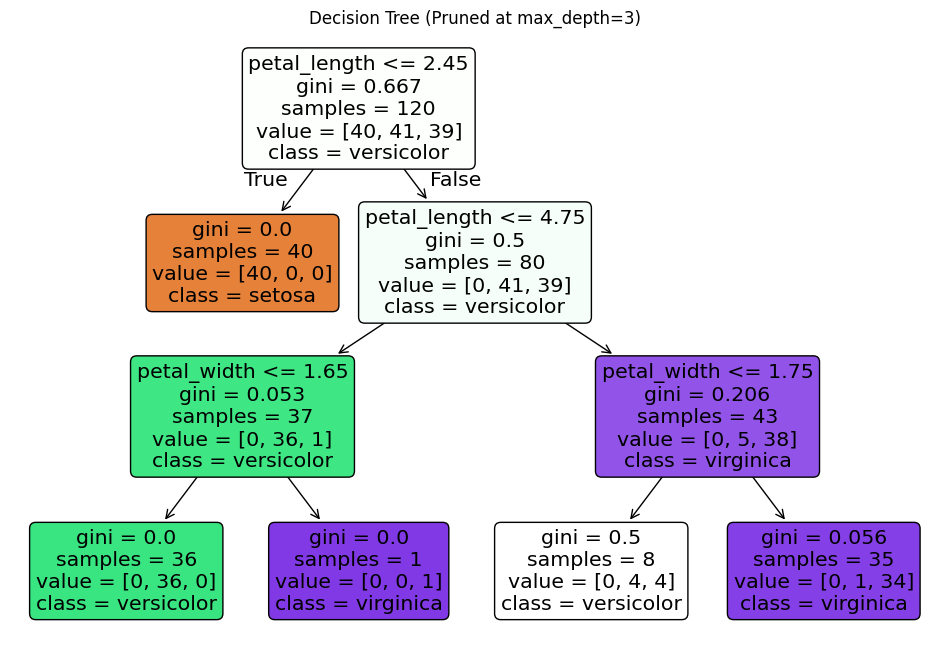

In [3]:
# Step 1: Load the dataset
df = pd.read_csv('/mnt/1) iris.csv')

# Step 2: Check column names and structure
print(df.head())
print("\nColumns:", df.columns)

# Step 3: Feature & Target split
# Assume 'species' or similar column is the target
target_col = 'species'  # change this if the column name is different
X = df.drop(target_col, axis=1)
y = df[target_col]

# Step 4: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 5: Train Decision Tree Classifier
# We'll restrict max_depth to prevent overfitting (pruning)
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = clf.predict(X_test)

print("\n✅ Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-Score (macro):", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 7: Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=clf.classes_,
    filled=True,
    rounded=True
)
plt.title("Decision Tree (Pruned at max_depth=3)")
plt.show()
